<a href="https://colab.research.google.com/github/savibohra20/EventApplication/blob/master/Btechfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold  # Import cross-validation related functions

np.random.seed(0)

base_dir = "/content/drive/MyDrive/datasets"

with open(os.path.join(base_dir, "/content/drive/MyDrive/datasets/apnea-ecg.pkl"), "rb") as f:
    apnea_ecg = pickle.load(f)

print(apnea_ecg.keys())

def shift(xs, n):
    e = np.empty_like(xs)
    if n > 0:
        e[:n] = np.nan
        e[n:] = xs[:-n]
    elif n < 0:
        e[n:] = np.nan
        e[:n] = xs[-n:]
    else:
        e[:] = xs[:]
    return e

def acquisition_features(recordings, time_window_size):
    features = []
    labels = []
    groups = []
    for recording in recordings:
        data = apnea_ecg[recording]
        temp = []
        for w in range(time_window_size + 1):
            temp.append(shift(data[:, :-1], w))
        temp = np.concatenate(temp, axis=1)
        mask = ~np.isnan(temp).any(axis=1)
        features.append(temp[mask])
        labels.append(data[mask, -1])
        groups.append([recording] * sum(mask))
    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0)
    groups = np.concatenate(groups, axis=0)
    return features, labels, groups



odict_keys(['a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a07', 'a08', 'a09', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'b01', 'b02', 'b03', 'b04', 'b05', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10', 'x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08', 'x09', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35'])


In [ ]:
x_train, y_train, groups_train = acquisition_features(list(apnea_ecg.keys())[:35], 5)
x_test, y_test, groups_test = acquisition_features(list(apnea_ecg.keys())[35:], 5)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

MLP CLASSIFIER

In [ ]:
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error
# Define your MLPClassifier and set its hyperparameters
clf = MLPClassifier(hidden_layer_sizes=(x_train.shape[1] * 2 + 1,), alpha=1, max_iter=1000)

# Define the number of folds (e.g., 5-fold cross-validation)
k = 5

# Create a cross-validation object (k-fold)
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Perform cross-validation and compute the accuracy scores
scores = cross_val_score(clf, x_train, y_train, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, 1):
    print(f'Fold {fold} Accuracy: {score}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy}')
# Training on the entire training set
clf.fit(x_train, y_train)

# Evaluate on the test set
print(clf.score(x_test, y_test))

y_pred_mlp = clf.predict(x_test)
C = confusion_matrix(y_test, y_pred_mlp, labels=(1, 0))
TP, TN, FP, FN = C[0, 0], C[1, 1], C[1, 0], C[0, 1]
acc, sn, sp = 1. * (TP + TN) / (TP + TN + FP + FN), 1. * TP / (TP + FN), 1. * TN / (TN + FP)
print("Test Set - acc: {}, sn: {}, sp: {}".format(acc, sn, sp))

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print("RMSE:", rmse)

# Calculate and print F1-Score
f1 = f1_score(y_test, y_pred_mlp)
print("F1-Score:", f1)

# Calculate and print MAE
mae = mean_absolute_error(y_test, y_pred_mlp)
print("MAE:", mae)


# Error Analysis
# Get indices of misclassified samples
misclassified_indices = np.where(y_test != y_pred_mlp)[0]

# Print the number of misclassified samples
print("Number of misclassified samples: {}".format(len(misclassified_indices)))

# Analyze the misclassified samples
for index in misclassified_indices:
    print(f"Sample {index}: Predicted {y_pred_mlp[index]}, Actual {y_test[index]}")

# Classification Report
report = classification_report(y_test, y_pred_mlp, target_names=["Apnea", "Normal"])
print("\nClassification Report:\n", report)

Fold 1 Accuracy: 0.8974668275030157
Fold 2 Accuracy: 0.896562123039807
Fold 3 Accuracy: 0.8911338962605548
Fold 4 Accuracy: 0.8869119420989143
Fold 5 Accuracy: 0.890497737556561
Mean Accuracy: 0.8925145052917707
0.8664846902444814
Test Set - acc: 0.870282459055305, sn: 0.8239556035147217, sp: 0.8992764109985528
RMSE: 0.3601632143135873
F1-Score: 0.8302267785026405
MAE: 0.12971754094469498
Number of misclassified samples: 2186
Sample 17: Predicted 0.0, Actual 1.0
Sample 18: Predicted 0.0, Actual 1.0
Sample 19: Predicted 0.0, Actual 1.0
Sample 20: Predicted 0.0, Actual 1.0
Sample 26: Predicted 1.0, Actual 0.0
Sample 30: Predicted 1.0, Actual 0.0
Sample 32: Predicted 1.0, Actual 0.0
Sample 33: Predicted 1.0, Actual 0.0
Sample 47: Predicted 0.0, Actual 1.0
Sample 48: Predicted 0.0, Actual 1.0
Sample 49: Predicted 0.0, Actual 1.0
Sample 55: Predicted 0.0, Actual 1.0
Sample 75: Predicted 1.0, Actual 0.0
Sample 99: Predicted 0.0, Actual 1.0
Sample 100: Predicted 0.0, Actual 1.0
Sample 101: Pr

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning (Grid Search)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Random Forest Parameters:", best_params)

# Train the best Random Forest model
best_rf.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred_rf = best_rf.predict(x_test)
C = confusion_matrix(y_test, y_pred_rf, labels=(1, 0))
TP, TN, FP, FN = C[0, 0], C[1, 1], C[1, 0], C[0, 1]
acc, sn, sp = accuracy_score(y_test, y_pred_rf), 1. * TP / (TP + FN), 1. * TN / (TN + FP)
print("Test Set - acc: {}, sn: {}, sp: {}".format(acc, sn, sp))

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE:", rmse)

# Calculate and print F1-Score
f1 = f1_score(y_test, y_pred_rf)
print("F1-Score:", f1)

# Calculate and print MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print("MAE:", mae)

# Error Analysis
misclassified_indices = np.where(y_test != y_pred_rf)[0]
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]

print("Number of misclassified samples: {}".format(len(misclassified_indices)))
# print("\nMisclassified Samples:")
for i, sample in enumerate(misclassified_samples[:10], 1):
    print(f"Sample {i} - Predicted: {y_pred_rf[misclassified_indices[i-1]]}, Actual: {misclassified_labels[i-1]}")

# Classification Report
report = classification_report(y_test, y_pred_rf, target_names=["Apnea", "Normal"])
print("\nClassification Report:\n", report)


Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}
Test Set - acc: 0.8658912888677902, sn: 0.7803298905503314, sp: 0.9194404245055475
RMSE: 0.36620856234147475
F1-Score: 0.8175064599483205
MAE: 0.13410871113220982
Number of misclassified samples: 2260
Sample 1 - Predicted: 1.0, Actual: 0.0
Sample 2 - Predicted: 1.0, Actual: 0.0
Sample 3 - Predicted: 1.0, Actual: 0.0
Sample 4 - Predicted: 1.0, Actual: 0.0
Sample 5 - Predicted: 0.0, Actual: 1.0
Sample 6 - Predicted: 0.0, Actual: 1.0
Sample 7 - Predicted: 0.0, Actual: 1.0
Sample 8 - Predicted: 0.0, Actual: 1.0
Sample 9 - Predicted: 0.0, Actual: 1.0
Sample 10 - Predicted: 0.0, Actual: 1.0

Classification Report:
               precision    recall  f1-score   support

       Apnea       0.87      0.92      0.89     10365
      Normal       0.86      0.78      0.82      6487

    accuracy                           0.87     16852
   macro avg       0.86      0.85      0.86     16852
weighted avg       0.87      0.87      

KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  # Example settings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],  # Vary the number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting type
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)  # X_train and y_train are your training data

# Get the best parameters from the search
best_params = grid_search.best_params_
print("Best KNN Parameters:", best_params)
best_knn = grid_search.best_estimator_
best_knn.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred_knn = best_knn.predict(x_test)
C = confusion_matrix(y_test, y_pred_knn, labels=(1, 0))
TP, TN, FP, FN = C[0, 0], C[1, 1], C[1, 0], C[0, 1]
acc, sn, sp = accuracy_score(y_test, y_pred_knn), 1. * TP / (TP + FN), 1. * TN / (TN + FP)
print("Test Set - acc: {}, sn: {}, sp: {}".format(acc, sn, sp))

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("RMSE:", rmse)

# Calculate and print F1-Score
f1 = f1_score(y_test, y_pred_knn)
print("F1-Score:", f1)

# Calculate and print MAE
mae = mean_absolute_error(y_test, y_pred_knn)
print("MAE:", mae)

# Error Analysis
misclassified_indices = np.where(y_test != y_pred_knn)[0]
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = y_test[misclassified_indices]

print("Number of misclassified samples: {}".format(len(misclassified_indices)))
# print("\nMisclassified Samples:")
for i, sample in enumerate(misclassified_samples[:10], 1):
    print(f"Sample {i} - Predicted: {y_pred_knn[misclassified_indices[i-1]]}, Actual: {misclassified_labels[i-1]}")

# Classification Report
report = classification_report(y_test, y_pred_knn, target_names=["Apnea", "Normal"])
print("\nClassification Report:\n", report)


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Test Set - acc: 0.854379302159981, sn: 0.8429166024356405, sp: 0.8615533043897733
RMSE: 0.3816028011427838
F1-Score: 0.8167289021657954
MAE: 0.145620697840019
Number of misclassified samples: 2454
Sample 1 - Predicted: 1.0, Actual: 0.0
Sample 2 - Predicted: 1.0, Actual: 0.0
Sample 3 - Predicted: 1.0, Actual: 0.0
Sample 4 - Predicted: 1.0, Actual: 0.0
Sample 5 - Predicted: 1.0, Actual: 0.0
Sample 6 - Predicted: 1.0, Actual: 0.0
Sample 7 - Predicted: 0.0, Actual: 1.0
Sample 8 - Predicted: 0.0, Actual: 1.0
Sample 9 - Predicted: 0.0, Actual: 1.0
Sample 10 - Predicted: 0.0, Actual: 1.0

Classification Report:
               precision    recall  f1-score   support

       Apnea       0.90      0.86      0.88     10365
      Normal       0.79      0.84      0.82      6487

    accuracy                           0.85     16852
   macro avg       0.84      0.85      0.85     16852
weighted avg       0.86      0

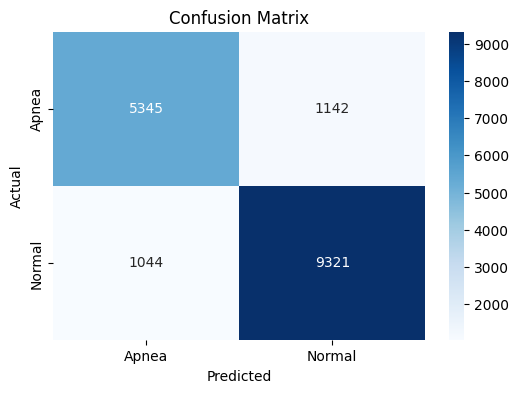

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already computed the confusion matrix (C) and labels
labels = ["Apnea", "Normal"]

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(C, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


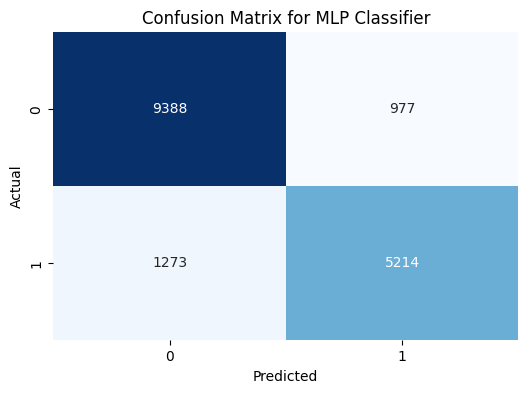

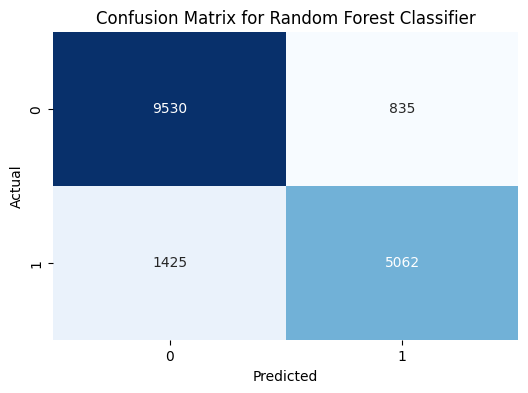

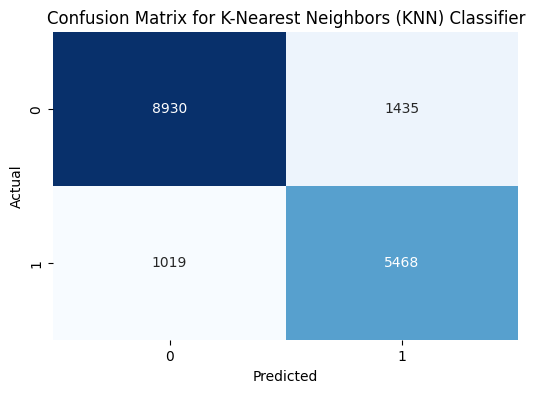

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define a function to visualize a confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Confusion matrix for MLP Classifier
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plot_confusion_matrix(cm_mlp, title="Confusion Matrix for MLP Classifier")

# Confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, title="Confusion Matrix for Random Forest Classifier")

# Confusion matrix for K-Nearest Neighbors (KNN) Classifier
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, title="Confusion Matrix for K-Nearest Neighbors (KNN) Classifier")


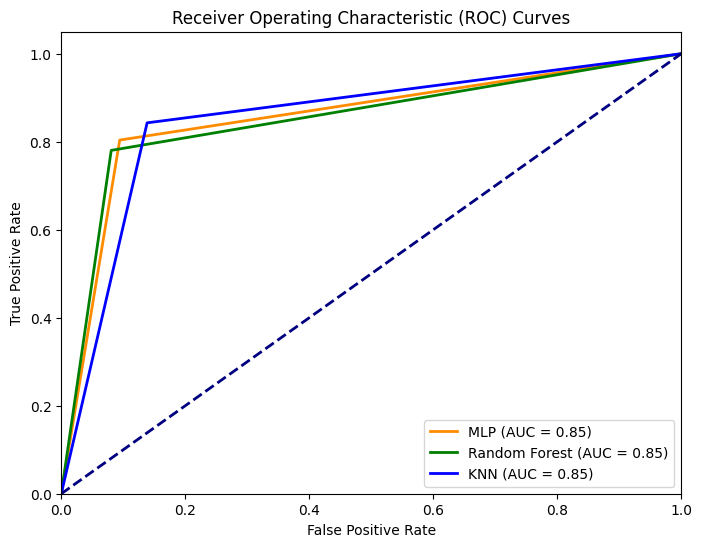

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
import numpy as np

# For MLP Classifier
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# For Random Forest Classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# For K-Nearest Neighbors (KNN) Classifier
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Define the time_window_size
time_window_size = 10  # Replace with your desired value

# Call the acquisition_features function with the defined time_window_size
features, labels, groups = acquisition_features(apnea_ecg.keys(), time_window_size)

# Print the shapes of the arrays to check their dimensions
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)
print("Groups shape:", groups.shape)

# Optionally, you can print a sample of the data
print("Sample of features:", features[:5])
print("Sample of labels:", labels[:5])
print("Sample of groups:", groups[:5])


Features shape: (32884, 198)
Labels shape: (32884,)
Groups shape: (32884,)
Sample of features: [[3.76154938e+01 6.37274982e+01 1.30000000e+01 1.91176471e+01
  8.65000000e+02 6.97459032e+01 1.83723513e-01 6.74614127e-01
  1.41662361e-01 4.76212682e+00 8.26452969e+01 1.73547031e+01
  3.79390978e-02 2.02471511e-01 7.59589391e-01 2.66553896e-01
  2.10456023e+01 7.89543977e+01 2.63240906e+01 5.92399368e+01
  3.00000000e+00 4.16666667e+00 8.15694444e+02 7.39311722e+01
  4.16235647e-01 3.85472227e-01 1.98292126e-01 1.94396134e+00
  6.60321626e+01 3.39678374e+01 8.03082432e-02 1.07336545e-01
  8.12355211e-01 1.32130063e-01 1.16709261e+01 8.83290739e+01
  1.98139494e+01 6.61394009e+01 2.00000000e+00 2.43902439e+00
  7.16219512e+02 8.44485431e+01 4.13867965e-01 5.32688234e-01
  5.34438012e-02 9.96725947e+00 9.08819518e+01 9.11804816e+00
  1.50382152e-01 4.77126134e-01 3.72491714e-01 1.28090402e+00
  5.61577344e+01 4.38422656e+01 1.47478812e+01 4.03973321e+01
  1.00000000e+00 1.23456790e+00 7.207